In [ ]:
#%%

# Step 1: Load the Nobel Prize dataset
import pandas as pd

data = pd.read_csv("nobel.csv")
print(data.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

In [ ]:
#%%

# Step 2: Identify the most common gender and birth country
top_gender = data['sex'].value_counts().index[0]
top_country = data['birth_country'].value_counts().index[0]

print(top_gender, top_country)

Male United States of America


In [ ]:
#%%

# Step 3: Find the decade with the highest proportion of US-born winners
data['usa_born'] = data['birth_country'] == 'United States of America'
data['decade'] = (data['year'] // 10) * 10

usa_proportions = data.groupby('decade')['usa_born'].mean().reset_index()
max_decade_usa = usa_proportions.loc[usa_proportions['usa_born'].idxmax(), 'decade']

print(max_decade_usa)

2000


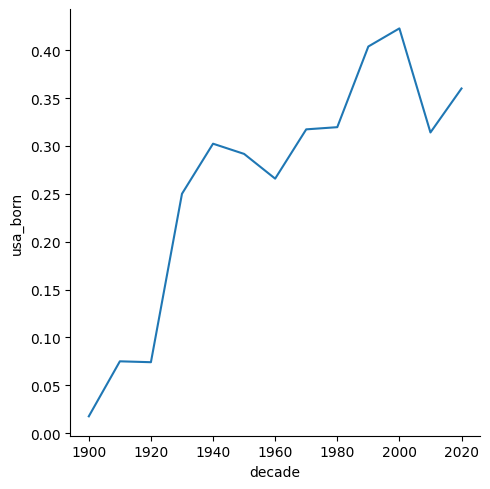

In [ ]:
#%%

# Optional Step: Plot the proportion of US-born winners by decade
import seaborn as sns
sns.relplot(x='decade', y='usa_born', kind='line', data=usa_proportions)

In [ ]:
#%%

# Step 4: Find the decade and category with the highest proportion of female winners
data['female_winner'] = data['sex'] == 'Female'

female_proportions = data.groupby(['decade', 'category'])['female_winner'].mean().reset_index()
max_female = female_proportions.loc[female_proportions['female_winner'].idxmax()]

max_female_list = [max_female['decade'], max_female['category']]
print(max_female_list)

[np.int64(2020), 'Literature']


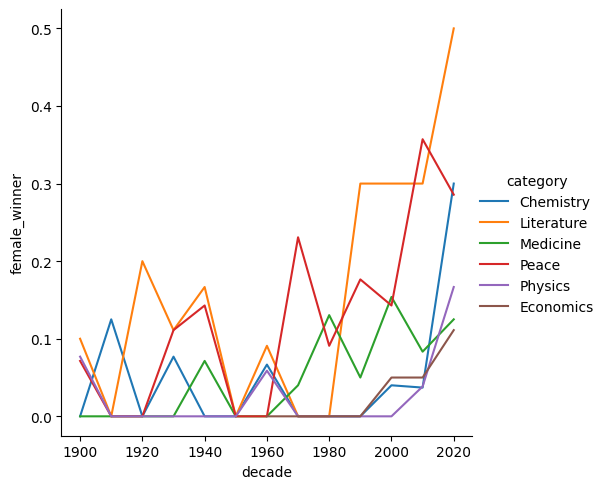

In [ ]:
#%%

# Optional Step: Plot the proportion of female winners by decade and category
sns.relplot(x='decade', y='female_winner', kind='line', hue='category', data=female_proportions)

In [ ]:
#%%

# Step 5: Find the first woman to win a Nobel Prize
first_woman = data[data['female_winner']].sort_values('year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

print(first_woman_name, first_woman_category)

Marie Curie, née Sklodowska Physics


In [ ]:
#%%

# Step 6: Identify winners with multiple Nobel Prizes
repeat_counts = data['full_name'].value_counts()
repeat_list = repeat_counts[repeat_counts >= 2].index.tolist()

print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Marie Curie, née Sklodowska', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger']
